# Author : Ussam Husain Siddiqui

GRIP August Batch,
Role- Data Science & Business Analytics Intern,

###### Assignment 1

## Simple Linear Regression using Python Sci-kit Learn

In this assignment, we are supposed to predict the percentage of marks for Students based on their no. of hours of study Further we are supposed to find the predicted score if a student studies for 9.25 Hours/day

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading dataset
df = pd.read_csv("student_scores.csv")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Describing the values
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#Checking for NAs
df.isnull()
#Checking the sum of null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no NULL values as stated above
Now lets plot the data points to check the relationship between the variables

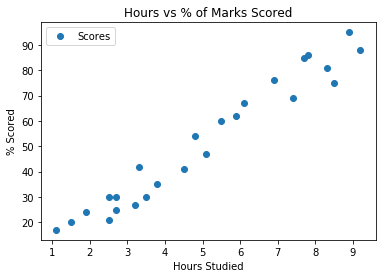

In [5]:
#Plotting the dataset
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs % of Marks Scored')
plt.xlabel('Hours Studied')
plt.ylabel('% Scored')
plt.show()

From the above graph, we can see that there is a positive linear relationship between the variables which means that with increase in the number of hours of study, the % of marks scored will increase

#### Next we will be dividing the dataset into "attributes" (inputs) and "labels" (outputs)

In [6]:
x = df.iloc[:, :-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y = df.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Now that we are ready with our input and output values, lets divide them into train and test using Sci-Kit learn library

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

## Training Algorithm
#### Now that we have split our data into train and test, its time to train our algo

In [9]:
from sklearn.linear_model import LinearRegression
glm = LinearRegression()
glm.fit(x_train, y_train)

print ("Training Complete")

Training Complete


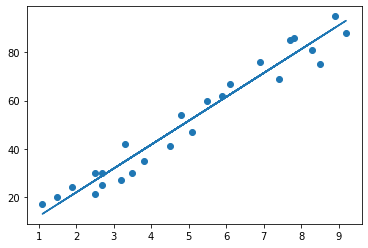

In [10]:
#Ploting regression line =>  (y = mx+c)
line = glm.coef_*x+glm.intercept_

#Ploting for test data
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

## Making Predictions
#### Now that we have trained our algo, let move ahead with predictions

In [11]:
#testing data (Hours)
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [12]:
#predicting the score
y_pred = glm.predict(x_test)

In [13]:
#Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#Testing for 9.25 hours
hours = [[9.25]]
own_pred = glm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating the model
#### In this final step, we will be evaluating the performance of the algorithm. We will use mean square error for this one

In [17]:
from sklearn import metrics
print('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute error: 4.183859899002975
